Plot all continuous or numeric/ordered variables against each other in scatterplots, or through a pairplot.

Plot a correlation matrix heatmap.

Plot latitude agains longitude.

Create a useable plot with 4 dimensions, e.g. x, y, color, size.

Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.

Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Exploring
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve
%matplotlib inline

import wrangle_zillow as wz

In [9]:
df = wz.zillow_clean()
df.head()

,parcelid,logerror,transactiondate,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,...,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount
0,14297519,0.025595,2017-01-01,1727539,14297519,3.5,4.0,3.5,3100.0,3100.0,...,1286.0,96978.0,0.0,1.0,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72
1,17052889,0.055619,2017-01-01,1387261,17052889,1.0,2.0,1.0,1465.0,1465.0,...,2061.0,97099.0,5.0,1.0,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48
2,14186244,0.005383,2017-01-01,11677,14186244,2.0,3.0,2.0,1243.0,1243.0,...,1286.0,97078.0,6.0,1.0,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30
3,12177905,-0.103410,2017-01-01,2288172,12177905,3.0,4.0,3.0,2376.0,2376.0,...,3101.0,96330.0,0.0,1.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51
4,12095076,-0.001011,2017-01-01,781532,12095076,3.0,4.0,3.0,2962.0,2962.0,...,3101.0,96293.0,0.0,1.0,1950.0,276684.0,773303.0,2016.0,496619.0,9516.26


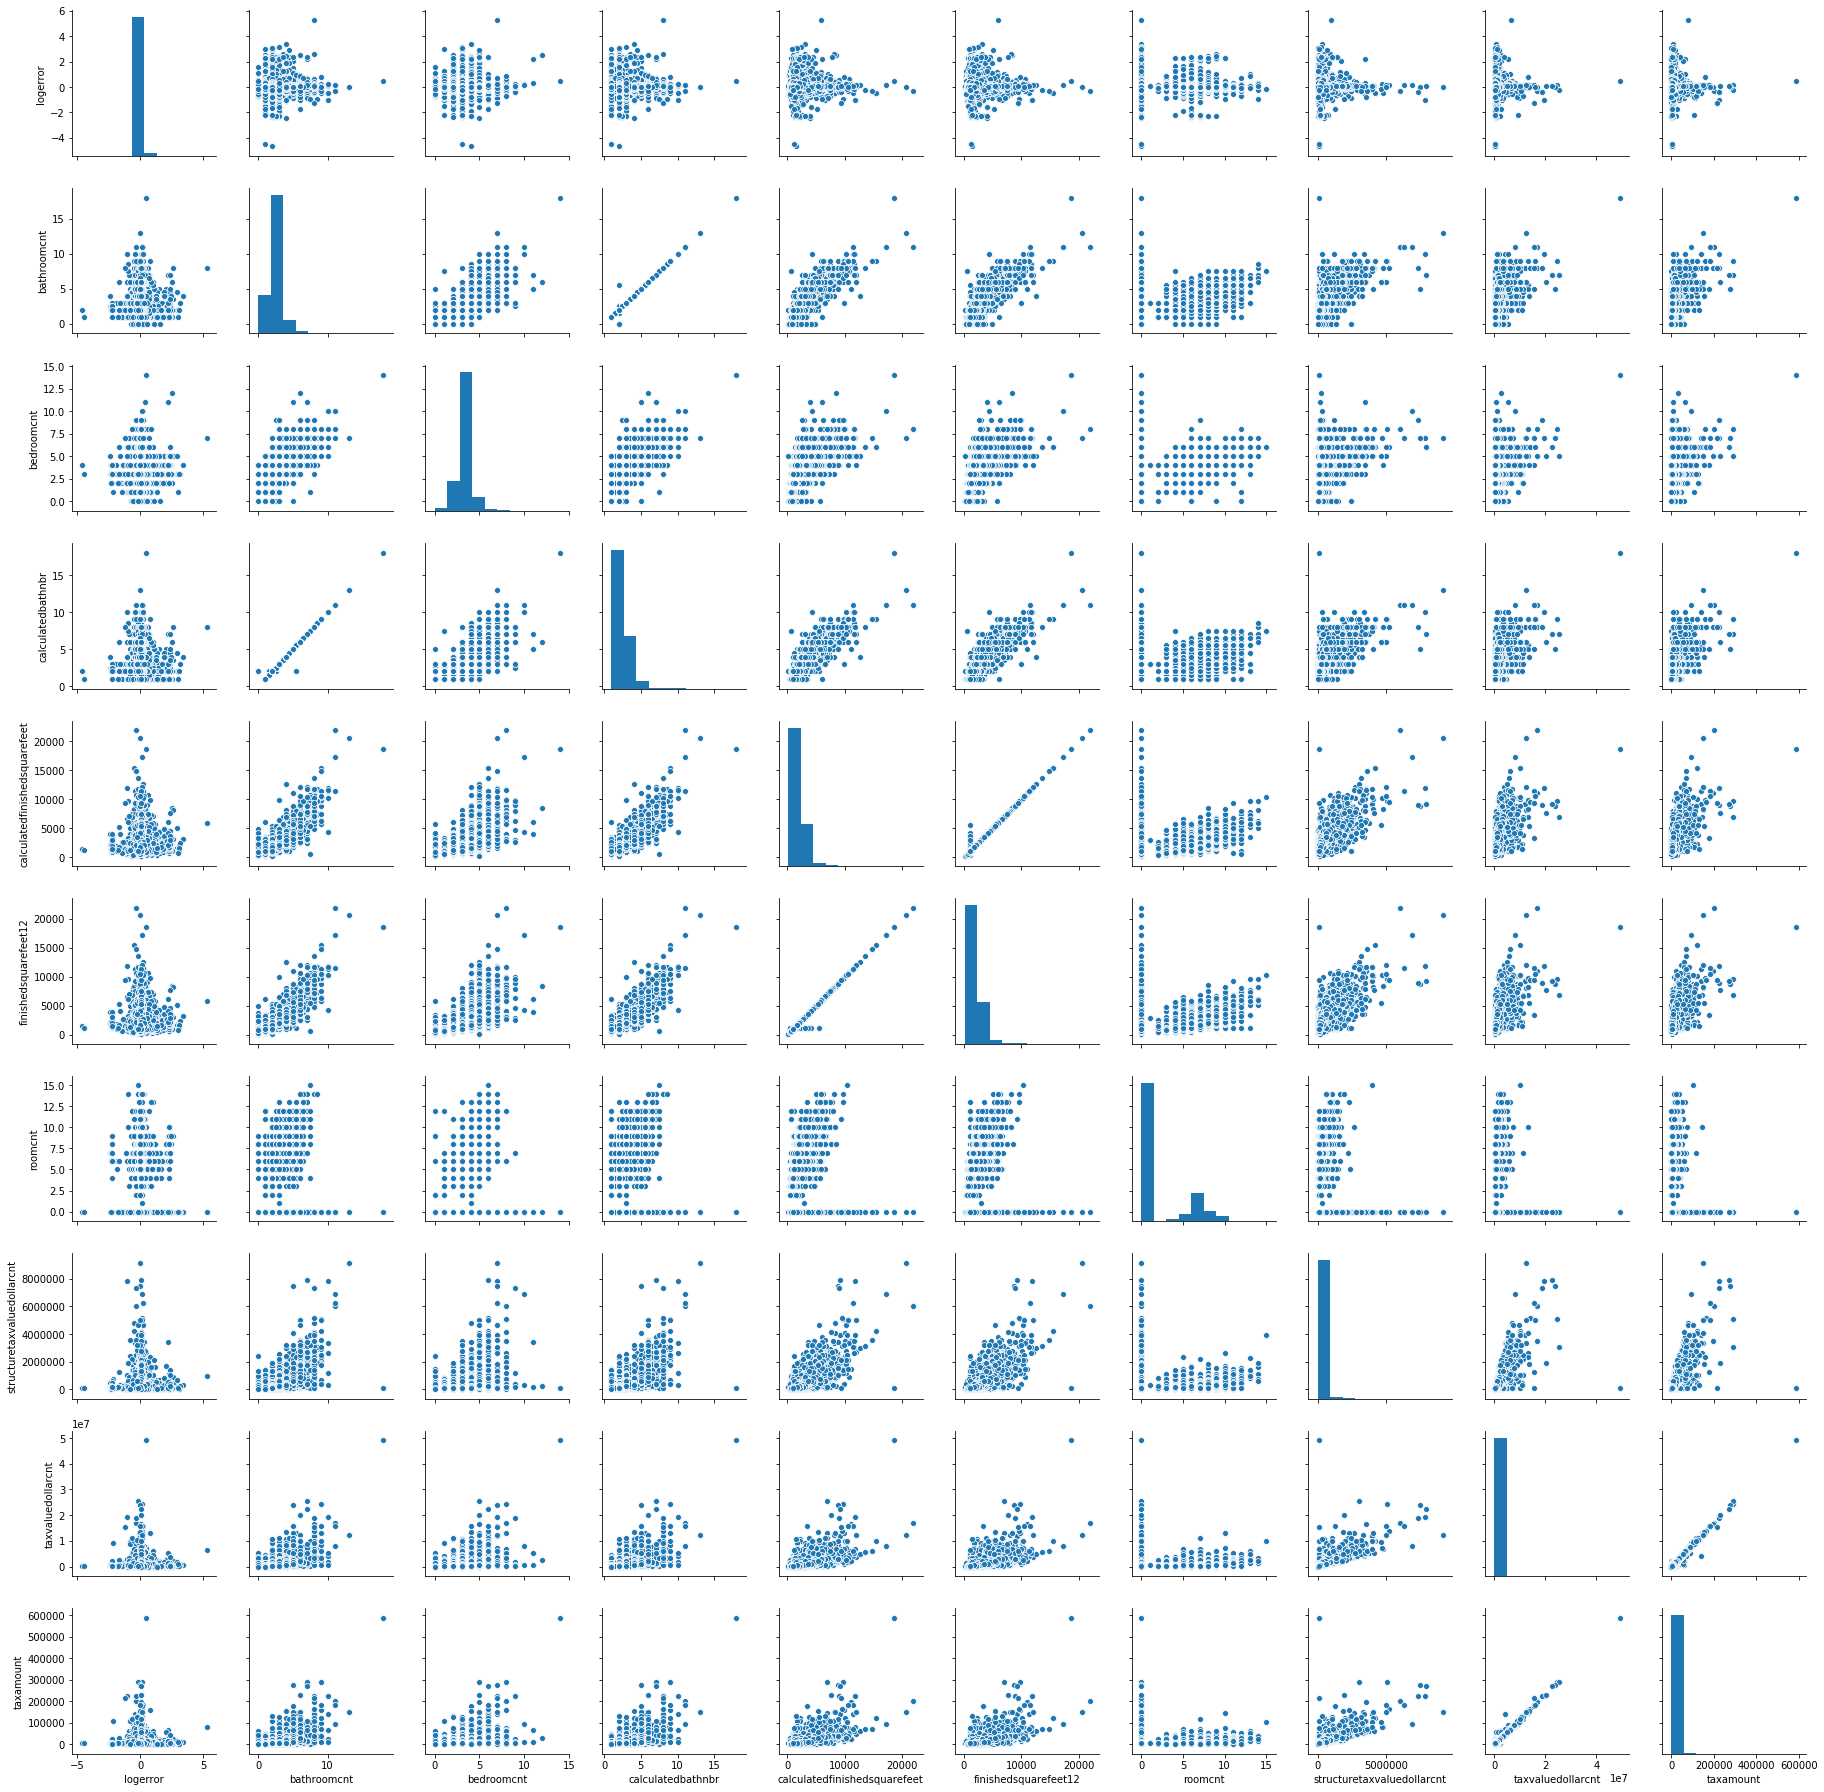

In [16]:
df_scatter = df[['logerror','bathroomcnt','bedroomcnt','calculatedbathnbr','calculatedfinishedsquarefeet','finishedsquarefeet12','roomcnt','structuretaxvaluedollarcnt','taxvaluedollarcnt','taxamount']]
sns.pairplot(df_scatter)
plt.show()

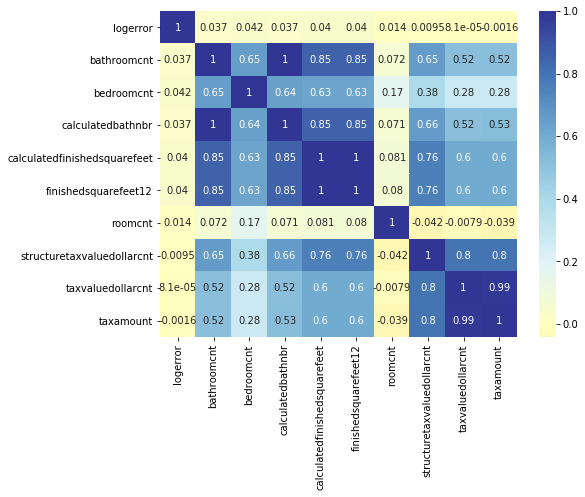

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(df_scatter.corr(), cmap='RdYlBu', annot=True, center=0)

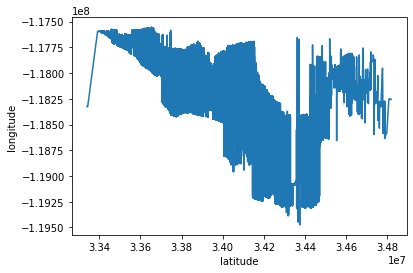

In [19]:
sns.lineplot(data=df, x='latitude', y='longitude')

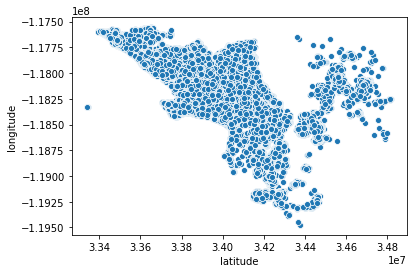

In [24]:
sns.scatterplot(x='latitude',y='longitude',data=df)
plt.show()

Create a useable plot with 4 dimensions, e.g. x, y, color, size.

Compute the mean(logerror) by zipcode and the overall mean(logerror). 

Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.

Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

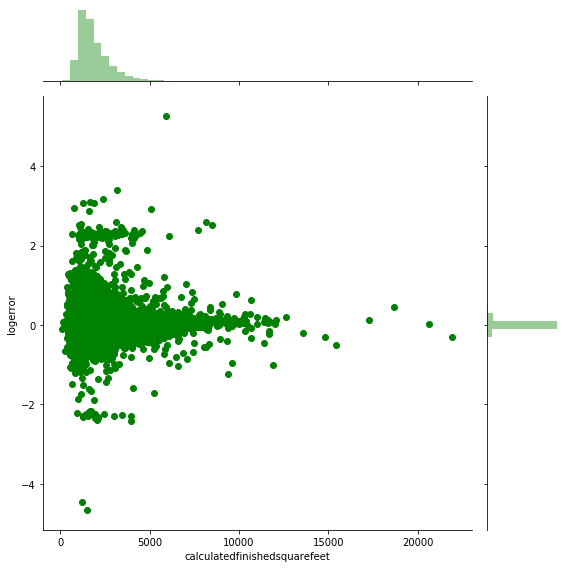

In [22]:
sns.jointplot(data=df, x='calculatedfinishedsquarefeet', y='logerror', size= 8, color='green', )

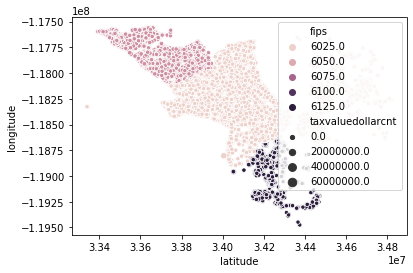

In [25]:
sns.scatterplot(x='latitude',y='longitude',hue='fips',size='taxvaluedollarcnt',data=df)
plt.legend()
plt.show()

Compute the mean(logerror) by zipcode and the overall mean(logerror).

Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.

Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

In [33]:
overall_mean=df.logerror.mean()
zips_errors=df.groupby('regionidzip')['regionidzip','logerror'].mean().reset_index()

ValueError: cannot reindex from a duplicate axis

In [35]:
import scipy as sp
zip_list=[]

for zips in df.regionidzip.unique():
    
    if sp.stats.ttest_ind(df[df.regionidzip ==zips].logerror,df[df.regionidzip!=zips].logerror)[-1] <0.05:
        zip_list.append(zips)

In [37]:
sp.stats.ttest_ind(df[df.fips =='Los_Angeles_County'].logerror,df[df.fips=='Orange_County'].logerror)

Ttest_indResult(statistic=nan, pvalue=nan)